In [12]:
%run Data_new.ipynb
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import datetime 
import time

oryginal_isotherms: 912
oryginal_bet: 912
oryginal_info: 912 



In [13]:
def calculate_time(transcription_time):
    timedelta_obj = datetime.timedelta(seconds=int(transcription_time))
    return str(timedelta_obj)

In [14]:
size = 40
X,y,info,oryginal = get_data(size,flat=True);
# for e in X[0]:
#     print(e)
y_all_nested = []
for i in range(len(y)):
    y_all_nested.append([y[i],info[i]])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_nested, y_test_nested, = train_test_split(X, y_all_nested, test_size=0.02, random_state=42) #random_state=42
y_train = [item[0] for item in y_train_nested]
y_train = np.array(y_train).astype(float)
y_test = [item[0] for item in y_test_nested]
y_test = np.array(y_test).astype(float)
# print(y_train)
# X_train = X_train.reshape(X_train.shape[0], -1)
# print(X[0])
#for n in X[0]:
#    print(n)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# print(X_train[0])
print(len(X_train))
print(len(X_test))

flat=True, returned one dimension data= [x,y,x,y,x,y,...]
X (912, 80)
y (912,)
info 912
oryginal_isotherms 912
return: X, y, info, oryginal_isotherms
893
19


In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(gpus))
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Num GPUs Available:  1


In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
print(len(X_train[0]))
X_train[0]

60


array([ 0.        ,  0.        ,  0.25041425,  0.14413544,  0.31336145,
        0.99169331,  0.20476743,  0.92881982,  0.16824488,  0.89802566,
        0.12683549,  0.8196245 ,  0.07700452,  0.77605021, -0.02518719,
        0.7072728 , -0.13380308,  0.64411161, -0.22062143,  0.59072137,
       -0.33083439,  0.53698388, -0.41111372,  0.4900993 , -0.50323198,
        0.45193443, -0.62381408,  0.41143536, -0.73879178,  0.37729957,
       -0.85317514,  0.3451854 , -0.96447267,  0.31878662, -1.04187587,
        0.29437002, -1.13773545,  0.27098461, -1.25071122,  0.25871584,
       -1.39350483,  0.24694581, -1.56206034,  0.22924362, -1.81485486,
        0.21134998, -1.99740384,  0.19371041, -1.93076128,  0.18552895,
       -1.834135  ,  0.16689026, -1.65768708,  0.15014137, -1.33137793,
        0.13426819, -0.61522928,  0.11305485,  0.62934087,  0.06794638])

In [7]:
epochs_number = 500

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(size)),  
    tf.keras.layers.Dense(size, activation='relu'), 
    tf.keras.layers.Dense(10000, activation='relu'), 
    tf.keras.layers.Dense(1)                      
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

metrics=['mae', 'mse']
model.compile(optimizer=optimizer, loss='mae', metrics=metrics)
# model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# history  =  model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=2)
start = time.time()
history  =  model.fit(X_train, y_train, epochs=epochs_number, batch_size=100,validation_split=0.1, verbose=2)
end = time.time()
transcription_time = calculate_time(round((end - start),2))
print(f"Model training time: "+transcription_time)

results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")


Epoch 1/500


I0000 00:00:1742202075.763035   13384 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10227 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2060, pci bus id: 0000:09:00.0, compute capability: 7.5
I0000 00:00:1742202076.603372   13440 service.cc:148] XLA service 0x716af40155f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1742202076.603403   13440 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2025-03-17 10:01:16.625352: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1742202076.720403   13440 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1742202077.260923   13440 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


9/9 - 2s - 244ms/step - loss: 1044.5190 - mae: 1044.5190 - mse: 1545912.3750 - val_loss: 1061.1125 - val_mae: 1061.1125 - val_mse: 1548778.2500
Epoch 2/500
9/9 - 0s - 8ms/step - loss: 1021.5764 - mae: 1021.5764 - mse: 1490573.1250 - val_loss: 1022.5118 - val_mae: 1022.5118 - val_mse: 1460957.5000
Epoch 3/500
9/9 - 0s - 8ms/step - loss: 968.7977 - mae: 968.7977 - mse: 1362726.0000 - val_loss: 944.4068 - val_mae: 944.4068 - val_mse: 1280651.5000
Epoch 4/500
9/9 - 0s - 8ms/step - loss: 867.0970 - mae: 867.0970 - mse: 1121200.8750 - val_loss: 826.6077 - val_mae: 826.6077 - val_mse: 989572.8750
Epoch 5/500
9/9 - 0s - 8ms/step - loss: 713.6731 - mae: 713.6731 - mse: 792575.3750 - val_loss: 683.3242 - val_mae: 683.3242 - val_mse: 654676.6250
Epoch 6/500
9/9 - 0s - 8ms/step - loss: 544.1027 - mae: 544.1027 - mse: 468497.9688 - val_loss: 532.8715 - val_mae: 532.8715 - val_mse: 401482.1250
Epoch 7/500
9/9 - 0s - 8ms/step - loss: 430.0940 - mae: 430.0940 - mse: 295005.4062 - val_loss: 437.2311 - 

Model training time without gpu, epoch = 1000 : 0:01:10

In [8]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Metrics:",results)
for index, metric in enumerate(metrics):
    print(f"{metric} = {results[index+1]}")

Metrics: [46.3441276550293, 46.3441276550293, 4228.52197265625]
mae = 46.3441276550293
mse = 4228.52197265625


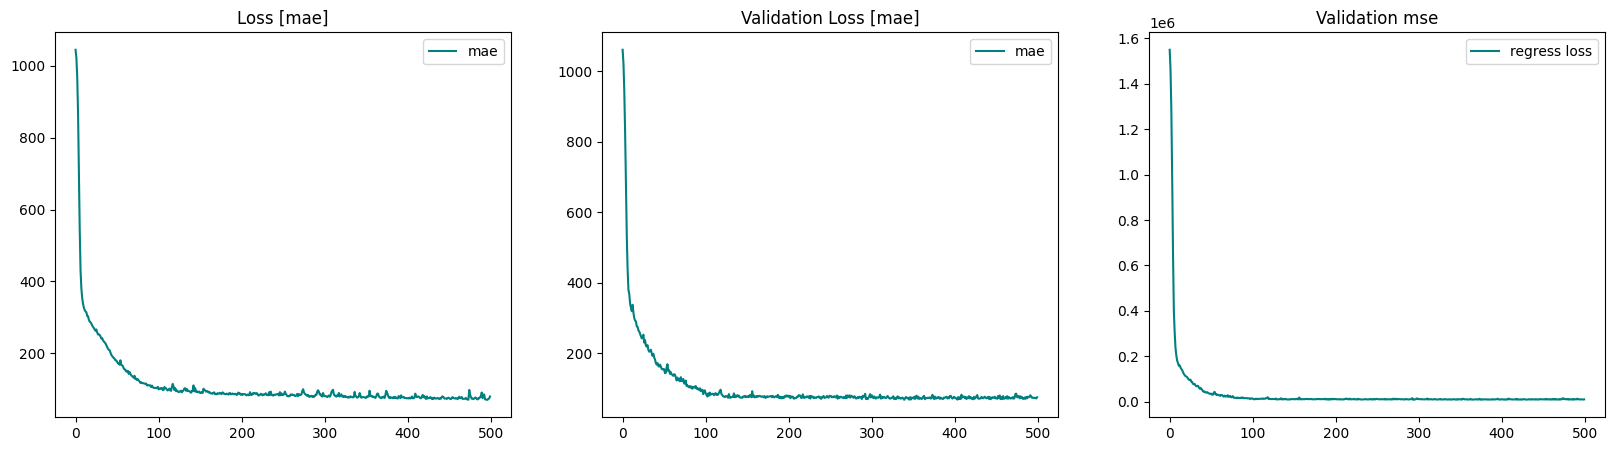

In [9]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(history.history['loss'], color='teal', label='mae')
# ax[0].plot(history.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss [mae]')
ax[0].legend()

ax[1].plot(history.history['val_loss'], color='teal', label='mae')
# ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Validation Loss [mae]')
ax[1].legend()

ax[2].plot(history.history['val_mse'], color='teal', label='regress loss')
# ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Validation mse')
ax[2].legend()

plt.show()

In [10]:
error_threshold = 30
max_error_threshold = 30
predictions = model.predict(X_test, verbose=0)
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)

print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")

print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

 przewidywana --> [2598.546]     2662.0 <-- rzeczyswista     blad: [63.45410156]  ['Data114', 'CS', '1', 'I']
 przewidywana --> [2538.6216]     2388.0 <-- rzeczyswista     blad: [150.62158203]  ['Data136', '1.5h_f5', '5', 'I']
 przewidywana --> [320.86444]     383.5 <-- rzeczyswista     blad: [62.63555908]  ['Data91', 'AC-ME1', '3_2', 'I']
 przewidywana --> [665.3402]     583.0 <-- rzeczyswista     blad: [82.34020996]  ['Data54', 'CZ0.15', '3', 'I']
 przewidywana --> [726.9632]     780.0 <-- rzeczyswista     blad: [53.0368042]  ['Data45', 'C-800-40', '1', 'I']
 przewidywana --> [753.88995]     790.0 <-- rzeczyswista     blad: [36.11004639]  ['Data5', 'S2AC-3h', '5_2', 'IV']
 przewidywana --> [100.26129]     26.0 <-- rzeczyswista     blad: [74.2612915]  ['Data125', 'bengkirai_wood_400', '3', 'I_II']
 przewidywana --> [439.96564]     548.0 <-- rzeczyswista     blad: [108.03436279]  ['Data12', 'N-2', '2', 'I']
 przewidywana --> [224.51953]     366.0 <-- rzeczyswista     blad: [141.4804687

In [22]:
# model.save("model_500_mae27_maxerror-57_warstwy-100-10000-50.keras")

In [16]:
from tensorflow.keras.models import load_model
model_name = 'model_500_mae27_maxerror-57_warstwy-100-10000-50.keras'
modelos = load_model(model_name)
predictions = modelos.predict(X_test, verbose=0)
print(f"len {len(X_test)}")
error_threshold = 30
max_error_threshold = 30
list_below =[]
list_above=[]
errors = []
for i in range(len(predictions)):
    errors.append(abs(predictions[i] - y_test[i]))
    # print(f"{i} {predictions[i]}  ------   {y_valid[i]}           blad: {abs(predictions[i] - y_valid[i])}")
    if(abs(predictions[i] - y_test[i]) > max_error_threshold):
        print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        
    if(error_threshold<=abs(predictions[i] - y_test[i])):
        list_above.append(i)
    else: list_below.append(i)
print("\nALL:")
for i in range(len(predictions)):
    print(f" przewidywana --> {predictions[i]}     {y_test[i]} <-- rzeczyswista     blad: {abs(predictions[i] - y_test[i])}  {y_test_nested[i][1]}")
        


print(f"max error: {max(errors)}  dla {y_test_nested[errors.index(max(errors))][1]} " )
print(f"for error thteshold[{error_threshold}] - {round((len(list_below)/len(predictions))*100,2)}%     {len(list_below)} izotermy na {len(predictions)}")

len 19
 przewidywana --> [910.5134]     864.0 <-- rzeczyswista     blad: [46.51342773]  ['Data61', 'CB', '1', 'I_II']
 przewidywana --> [641.1758]     583.0 <-- rzeczyswista     blad: [58.17578125]  ['Data54', 'CZ0.15', '3', 'I']
 przewidywana --> [741.87866]     780.0 <-- rzeczyswista     blad: [38.12133789]  ['Data45', 'C-800-40', '1', 'I']
 przewidywana --> [734.0487]     790.0 <-- rzeczyswista     blad: [55.95129395]  ['Data5', 'S2AC-3h', '5_2', 'IV']
 przewidywana --> [502.22983]     548.0 <-- rzeczyswista     blad: [45.77017212]  ['Data12', 'N-2', '2', 'I']
 przewidywana --> [245.48843]     366.0 <-- rzeczyswista     blad: [120.51156616]  ['Data7', 'RK-500', '3', 'I']
 przewidywana --> [1304.8511]     1357.0 <-- rzeczyswista     blad: [52.14892578]  ['Data89', 'AC-7', '3', 'I']
 przewidywana --> [1406.3344]     1357.0 <-- rzeczyswista     blad: [49.33435059]  ['Data89', 'AC-7', '4', 'I']
 przewidywana --> [969.36456]     930.0 <-- rzeczyswista     blad: [39.36456299]  ['Data90', 

In [ ]:
#  przewidywana --> [553.189]     249.0 <-- rzeczyswista     blad: [304.18903]  ['Data125', 'coconut_shells_6h', '7']
#  przewidywana --> [1967.7969]     1616.22 <-- rzeczyswista     blad: [351.5769]  ['Data153', 'GC-C04', '4']
#  przewidywana --> [1556.715]     1193.2 <-- rzeczyswista     blad: [363.515]  ['Data54', 'CZ0.65', '3']
#  przewidywana --> [1296.133]     938.0 <-- rzeczyswista     blad: [358.13306]  ['Data15', '3', '1']
#  przewidywana --> [732.7655]     1188.0 <-- rzeczyswista     blad: [455.2345]  ['Data156', 'MCAC-2-1', '4']
#  przewidywana --> [573.38586]     976.0 <-- rzeczyswista     blad: [402.61414]  ['Data47', 'ACF30M-HNO3', '3']
#  przewidywana --> [350.85513]     823.0 <-- rzeczyswista     blad: [472.14487]  ['Data86', 'ACZ3', '2']
# max error: [472.14487]  dla ['Data86', 'ACZ3', '2'] 
# for error thteshold[50] - 57.8%     100 izotermy na 173